<h1> META GEN </h1>

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/dataset/

Mounted at /content/drive
/content/drive/MyDrive/dataset


In [6]:
import sys
sys.path.insert(0,'')

In [4]:
import os
import torch
import numpy as np
from PIL import Image
import torch.nn as nn
from torch.autograd import Variable
import torchvision.models as models
import torchvision.transforms as transforms
import json
import time
from shutil import copyfile
import pickle
import argparse
from Decoder import RNN
from utils import get_cnn
import matplotlib.pyplot as plt
from Vocabulary import Vocabulary
from torchvision import transforms
from torch.autograd import Variable
from Preprocess import load_captions
from DataLoader import shuffle_data,DataLoader

In [4]:

# def read_captions(filepath):
# 	captions_dict = {}
# 	with open(filepath) as f:
# 		for line in f:
# 			line_split = line.split(sep='\t', maxsplit=1)
# 			caption = line_split[1][:-1]
# 			id_image = line_split[0].split(sep='#')[0]
# 			if id_image not in captions_dict:
# 				captions_dict[id_image] = [caption]
# 			else:
# 				captions_dict[id_image].append(caption)
# 	return captions_dict

# def get_ids(filepath):
# 	ids = []
# 	with open(filepath) as f:
# 		for line in f:
# 			ids.append(line[:-1])
# 	return ids

# def copyfiles(dir_output, dir_input, ids):
# 	if not os.path.exists(dir_output):
# 		os.makedirs(dir_output)
# 	for cur_id in ids:
# 		path_input = os.path.join(dir_input, cur_id)
# 		path_output = os.path.join(dir_output, cur_id)
# 		try:
# 		  copyfile(path_input, path_output)
# 		except OSError:
# 		  print("File error") 

# def write_captions(dir_output, ids, captions_dict):
# 	output_path = os.path.join(dir_output, 'captions.txt')
# 	output = []
# 	for cur_id in ids:
# 		if cur_id in captions_dict:
# 			cur_dict = {cur_id: captions_dict[cur_id]}
# 			output.append(json.dumps(cur_dict))
		
# 	with open(output_path, mode='w') as f:
# 		f.write('\n'.join(output))

# def segregate(dir_images, filepath_token, captions_path_input):
# 	dir_output = {'train': 'train',
# 				  'dev'  : 'dev',
# 				  'test' : 'test'
# 				 }
	
# 	# id [caption1, caption2, ..]
# 	captions_dict = read_captions(filepath_token)
	
# 	# train, dev, test images mixture
# 	images = os.listdir(dir_images)
	
# 	# read ids
# 	ids_train = get_ids(captions_path_input['train'])
# 	ids_dev = get_ids(captions_path_input['dev'])
# 	ids_test = get_ids(captions_path_input['test'])
	
# 	# copy images to respective dirs
# 	copyfiles(dir_output['train'], dir_images, ids_train)
# 	copyfiles(dir_output['dev'], dir_images, ids_dev)
# 	copyfiles(dir_output['test'], dir_images, ids_test)
	
# 	# write id
# 	write_captions(dir_output['train'], ids_train, captions_dict)
# 	write_captions(dir_output['dev'], ids_dev, captions_dict)
# 	write_captions(dir_output['test'], ids_test, captions_dict)

# def load_captions(captions_dir):
# 	caption_file = os.path.join(captions_dir, 'captions.txt')
# 	captions_dict = {}
# 	with open(caption_file) as f:
# 		for line in f:
# 			cur_dict = json.loads(line)
# 			for k, v in cur_dict.items():
# 				captions_dict[k] = v
# 	return captions_dict


# dir_images = 'Images/Images/'
# dir_text = ''
# filename_token = 'Flickr8k.token.txt'
# filename_train = 'Flickr_8k.trainImages.txt'
# filename_dev = 'Flickr_8k.devImages.txt'
# filename_test = 'Flickr_8k.testImages.txt'
# filepath_token = os.path.join(dir_text, filename_token)
# captions_path_input = {'train': os.path.join(dir_text, filename_train),
#               'dev': os.path.join(dir_text, filename_dev),
#               'test': os.path.join(dir_text, filename_test)
#             }

# tic = time.time()
# segregate(dir_images, filepath_token, captions_path_input)
# toc = time.time()
# print('time: %.2f mins' %((toc-tic)/60))

In [5]:
import nltk
nltk.download('punkt')
from nltk import sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [7]:
!python3 train.py -model alexnet -dir train/  -learning_rate 0.1 -epoch 1 -gpu_device cuda

usage: train.py [-h] [-model MODEL] [-dir DIR] [-save_iter SAVE_ITER]
                [-learning_rate LEARNING_RATE] [-epoch EPOCH]
                [-gpu_device GPU_DEVICE] [-hidden_dim HIDDEN_DIM]
                [-embedding_dim EMBEDDING_DIM]
train.py: error: argument -gpu_device: invalid int value: 'cuda'


In [12]:
!python3 test.py -model alexnet -i test/54501196_a9ac9d66f2.jpg -epoch 200 
!python3 test.py -model alexnet -i test/54501196_a9ac9d66f2.jpg -epoch 230 

 <start> a woman is standing on the sand near a beach . <end>
 <start> a man is walking along a <unk> mountain with a blue sky and blue sky . <end>


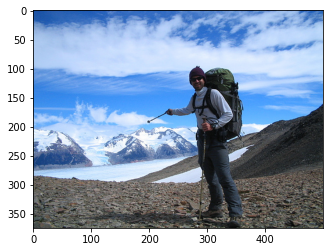

In [11]:
im = plt.imread("test/54501196_a9ac9d66f2.jpg")
fig, ax = plt.subplots()
im = ax.imshow(im)
plt.show()

In [6]:
torch.cuda.is_available()
torch.cuda

True

In [11]:
!nvidia-smi

Wed Mar 23 16:03:45 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8    32W / 149W |      3MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------